In [1]:
import numpy as np
import pandas as pd
#最大表示行数の指定（ここでは50行を指定）
pd.set_option('display.max_rows', 50)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
def plot_confusion_matrix(test_y,pred_y,class_names,normalize=False, fontsize=32):
    cm = (confusion_matrix(test_y,pred_y))
    # classes = class_names[unique_labels(test_y,pred_y)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims=True)
    
    if len(class_names) <= 3:
        fig, ax = plt.subplots(figsize=(8, 4))
    else:
        fig, ax = plt.subplots(figsize=(16, 8))

    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names,
           yticklabels=class_names,
           ylabel='True label\n',
           xlabel='\nPredicted label')
    fmt = '.2f' if normalize else 'd'
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,
                    i,
                    format(cm[i, j] * 100, fmt),
                    ha="center",
                    va="center",
                    color="red", fontsize=fontsize)
    fig.tight_layout()
    return ax

In [3]:
def rename(kind, hold_position, name):
    folder_name = "pattern2NewTest"
    if kind == "test":
        file_path = folder_name + "/" + kind + "_" + name + "分類_pattern2.npy"
        return file_path
    
    if name == "a安部":
        file_path = folder_name + "/" + name + "分類_" + kind + "_" + hold_position + "_pattern2.npy"
#     elif name == "熊野" and kind == "validation":
#         file_path = "pattern" + pattern + "/val_" + hold_position + "_" + name + "分類.npy"
    else:
        file_path = folder_name + "/" + kind + "_" + hold_position + "_" + name + "分類_pattern2.npy"
    return file_path

In [4]:
def pattern2Concat(kind, hold_position, name):
    if kind == "train":
        label = np.load("../../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1, 1])
        label = np.delete(label, 120845, 0)
        pattern_file = np.array([1] * label.shape[0]).reshape([-1, 1])
    else:
        label = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
        pattern_file = np.load("validation_pattern2.npy")
        print("pattern2.npyのshape", pattern_file.shape)
    
    file_path = rename(kind, hold_position, name)
    
    print(name, np.load(file_path).shape)
    print(np.argmax(np.load(file_path), axis=1), np.argmax(np.load(file_path), axis=1).reshape([-1, 1]).shape)
    predict = np.argmax(np.load(file_path), axis=1).reshape([-1, 1])
    print(name, np.load(file_path))
    if kind == "train" and (name == "安部" or name == "横山"):
        predict = np.delete(predict, 120845, 0)
    
#     if name != "熊野":
    predict += 1

    # ユーザ番号も入れとく
    if kind == "validation":
        user_label = [2] * 14813 + [3] * 13872
        user_label = np.array(user_label).reshape([-1, 1])

        print(pattern_file.shape, label.shape, predict.shape, np.unique(predict))
        result = np.concatenate([pattern_file.reshape([-1, 1]), user_label, label, predict], axis=1).astype(np.int32)
        result = pd.DataFrame(result, columns=["pattern", "user", "label", name + "predict"])
        return result
    else:
        print(pattern_file.shape, label.shape, predict.shape, np.unique(predict))
        result = np.concatenate([pattern_file.reshape([-1, 1]), label, predict], axis=1).astype(np.int32)
        result = pd.DataFrame(result, columns=["pattern", "label", name + "predict"])
        return result

# すべての保持位置の評価データに対する結果を出す

In [5]:
# hold_positions = ["Bag", "Hips", "Torso", "Hand"]
hold_positions = ["Hips"]
names = ["安部", "安部2", "関口", "熊野", "横山", "横山2"]
# names = ["安部", "関口", "横山"]
# names = ["安部", "関口", "熊野"]
# names = ["安部", "関口"]
patterns = []

for name in names:
    tmp = pattern2Concat("validation", hold_positions[0], name)
    for hold_position in hold_positions[1:]:
        tmp = pd.concat([tmp, pattern2Concat("validation", hold_position, name)], axis=0)
    print(name, tmp.shape)
    patterns.append(tmp)
    
patterns[0].shape

pattern2.npyのshape (28685,)
安部 (28685, 8)
[1 2 2 ... 3 1 0] (28685, 1)
安部 [[1.95066050e-01 6.23293281e-01 1.45035796e-03 ... 1.22903166e-02
  3.11116520e-02 7.37895863e-03]
 [1.68791266e-05 1.53262191e-03 9.95982051e-01 ... 2.19822934e-04
  3.51408060e-04 4.45060956e-04]
 [6.87648162e-06 9.93867777e-03 9.88989055e-01 ... 8.14304294e-05
  5.88666353e-06 2.00221821e-05]
 ...
 [2.41750944e-02 1.57779828e-01 1.06505826e-02 ... 3.20019163e-02
  4.56323735e-02 1.34853963e-02]
 [5.96604601e-04 9.87610996e-01 3.21789575e-03 ... 1.40547039e-04
  1.21713776e-04 1.56384049e-04]
 [5.28612733e-01 4.65843966e-03 1.51982065e-04 ... 3.26062262e-01
  7.52535611e-02 1.78968553e-02]]
(28685,) (28685, 1) (28685, 1) [1 2 3 4 5 6 7 8]
安部 (28685, 4)
pattern2.npyのshape (28685,)
安部2 (28685, 8)
[1 2 2 ... 1 3 0] (28685, 1)
安部2 [[6.0028736e-02 7.8736287e-01 3.1224886e-02 ... 3.6328938e-02
  3.7968013e-02 7.5829639e-03]
 [8.4712483e-06 3.5778552e-02 6.4246589e-01 ... 3.1574192e-03
  2.9728617e-05 6.5799009e-05]
 

(28685, 4)

安部 0.8083909761986734
安部2 0.8292810879880637
関口 0.8540331058300858
熊野 0.576919507260441
横山 0.8761756800367257
横山2 0.6530210587782892


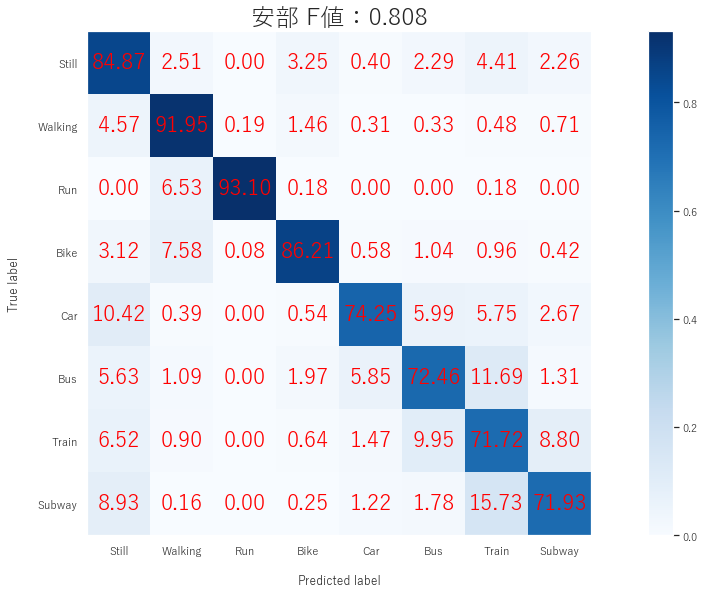

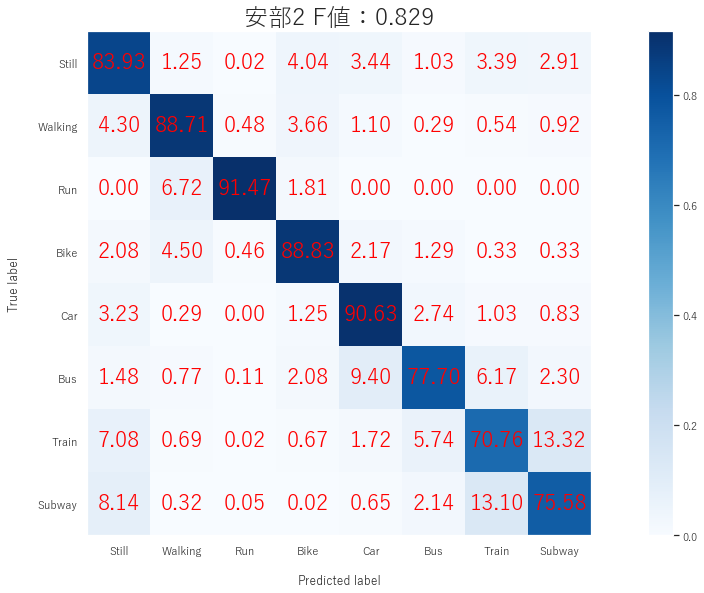

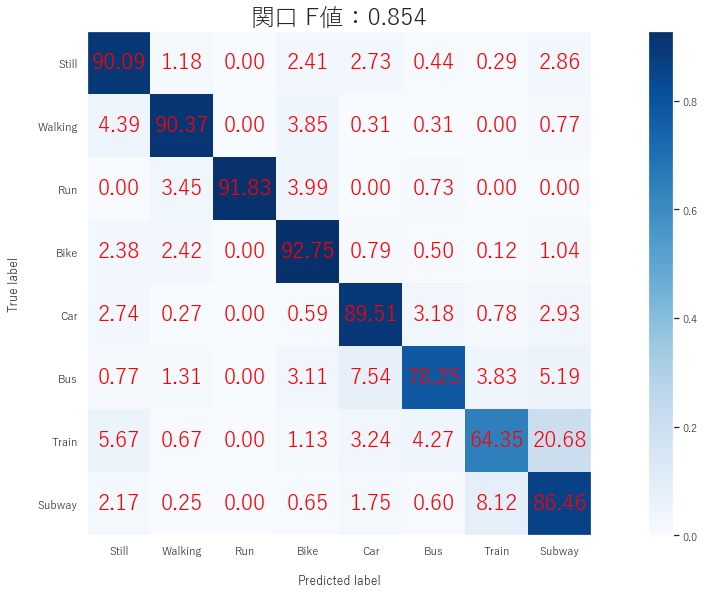

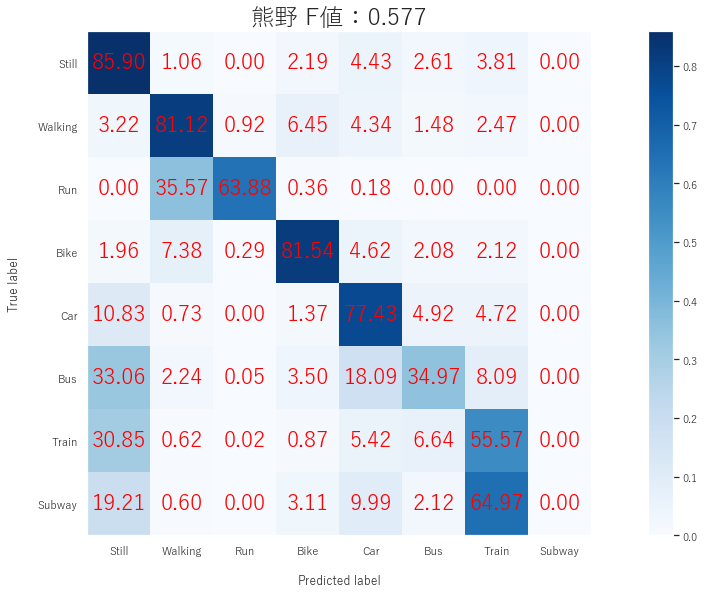

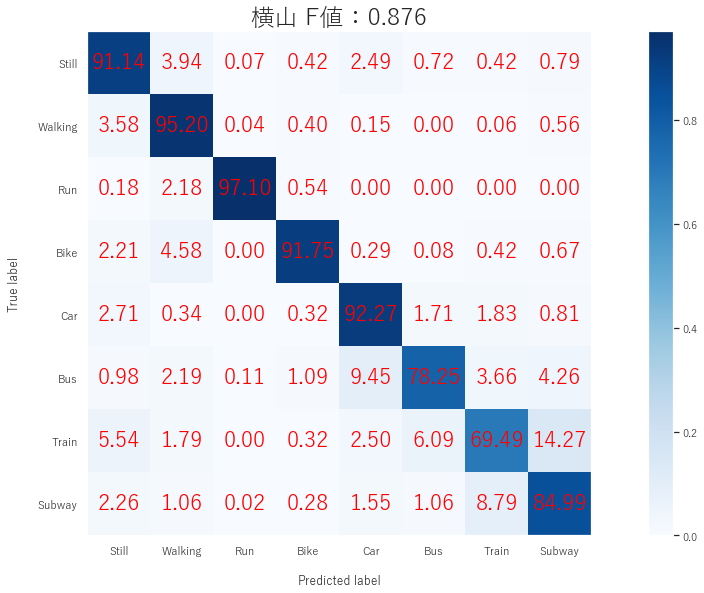

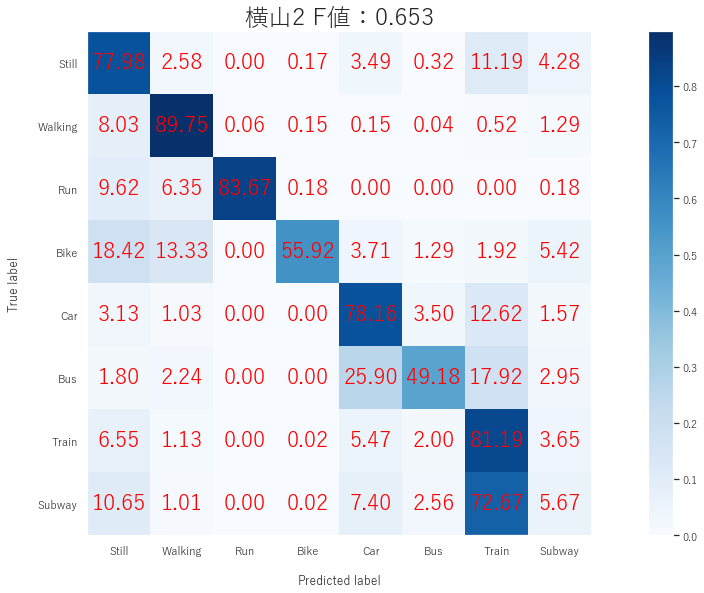

In [6]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]

for pattern, name in zip(patterns, names):
    plot_confusion_matrix(pattern['label'], pattern[name + "predict"], class_names, normalize=True, fontsize=22)
    plt.grid(False)

    f1 = f1_score(pattern['label'], pattern[name + "predict"], average="macro")
    plt.title(name + " F値：" + "{0:.3f}".format(f1), fontsize=24)
    print(name, f1)

安部 0.7340504486613508
安部2 0.7641443364282987
関口 0.7819133220602126
熊野 0.503836990359164
横山 0.8136892691685134
横山2 0.6450236895027083


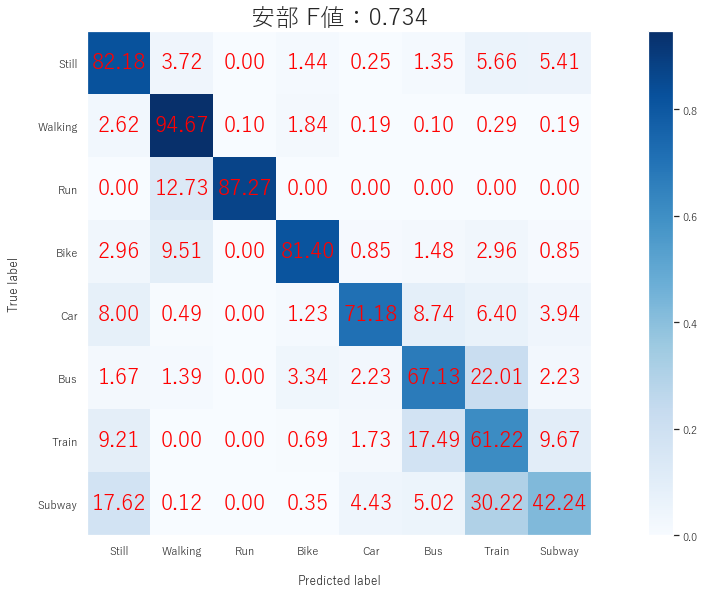

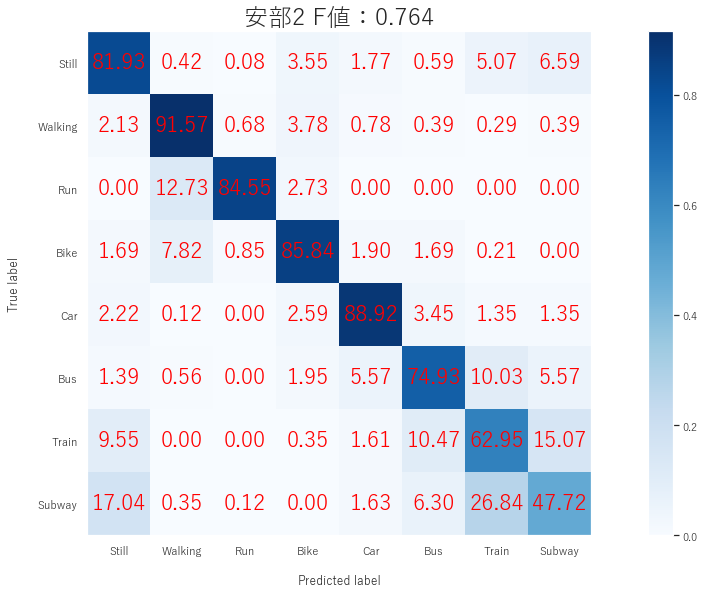

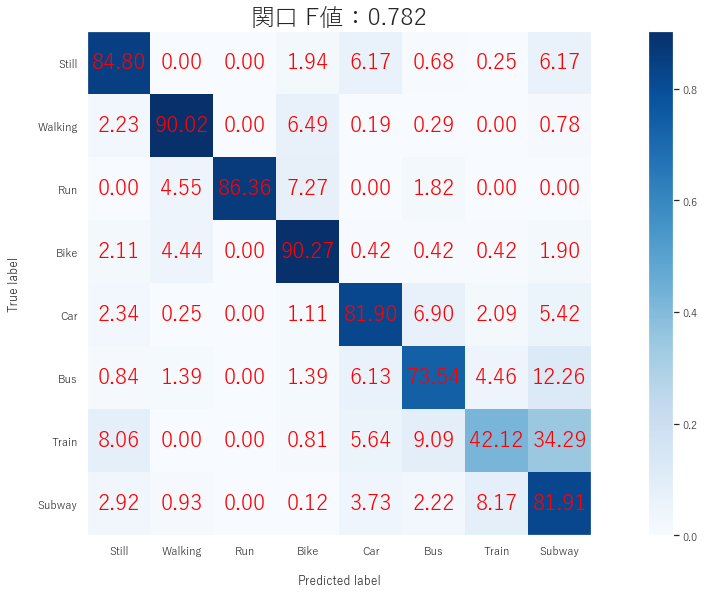

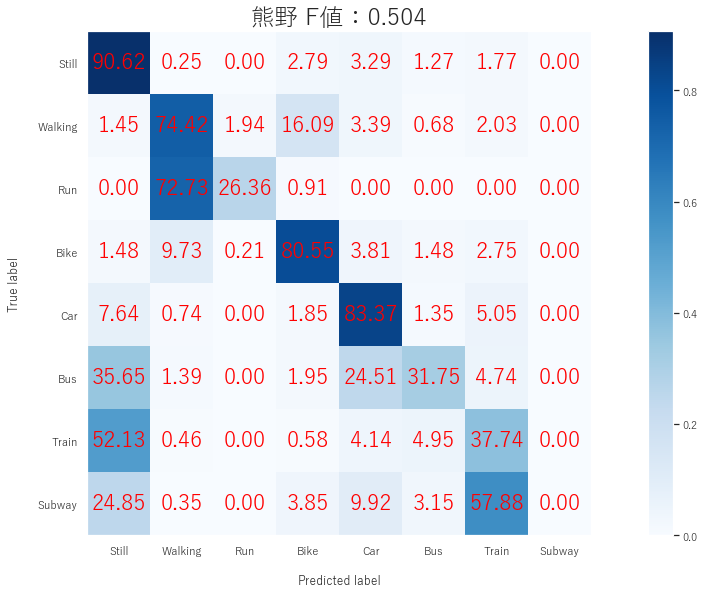

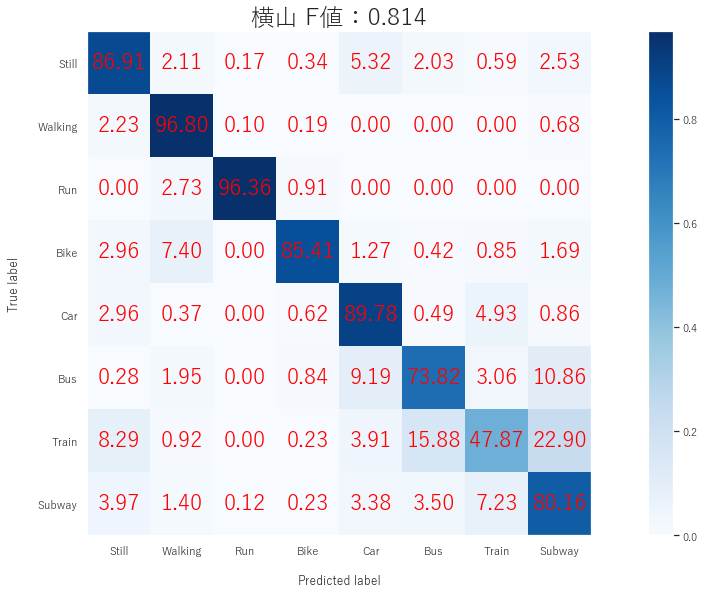

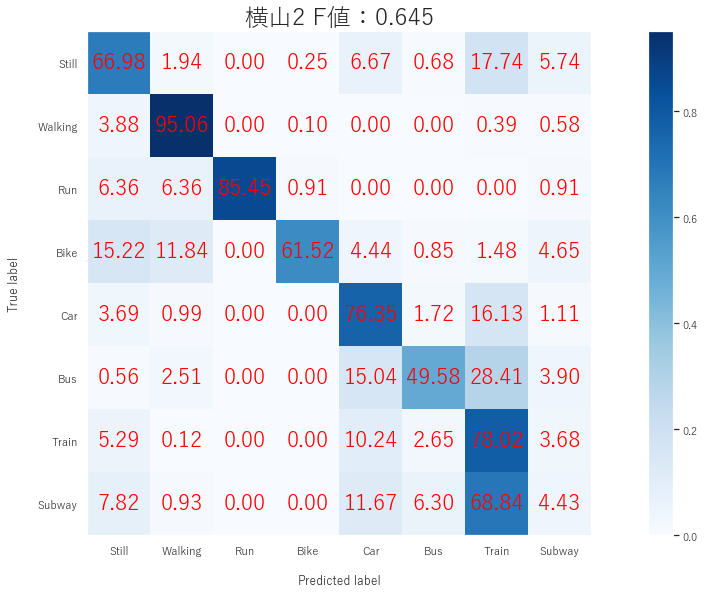

In [7]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]

for pattern, name in zip(patterns, names):
    plot_confusion_matrix(pattern[pattern['pattern'] == 0]['label'], pattern[pattern['pattern'] == 0][name + "predict"], class_names, normalize=True, fontsize=22)
    plt.grid(False)

    f1 = f1_score(pattern[pattern['pattern'] == 0]['label'], pattern[pattern['pattern'] == 0][name + "predict"], average="macro")
    plt.title(name + " F値：" + "{0:.3f}".format(f1), fontsize=24)
    print(name, f1)

# ユーザごとに混同行列

安部 0.7132285846309506
安部2 0.7215252270902168
関口 0.7070878521579003
熊野 0.5137310131970791
横山 0.7320731714176494
横山2 0.6296537511621615
安部 0.7195885930044578
安部2 0.774435420358311
関口 0.7607377196521139
熊野 0.37394909145345745
横山 0.7643843342528567
横山2 0.5526158645520423


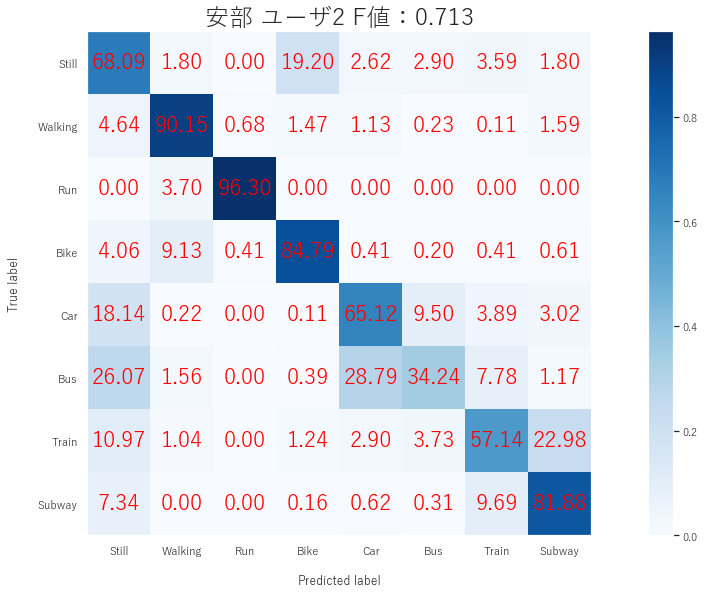

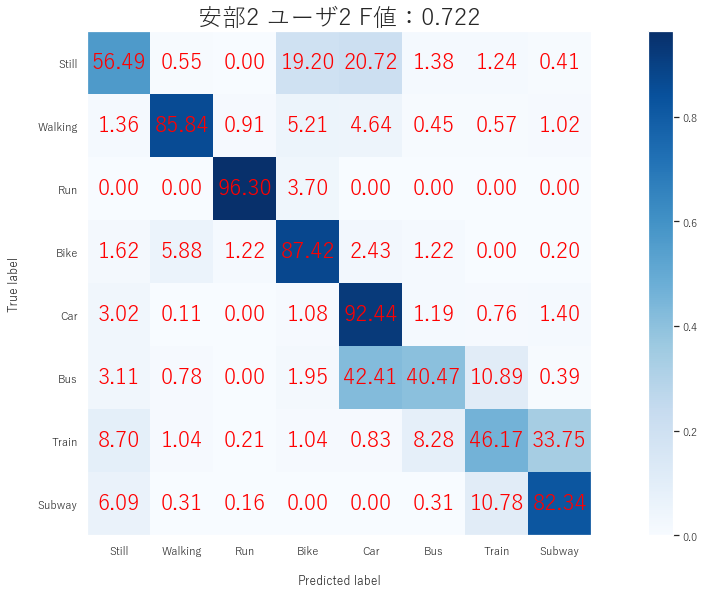

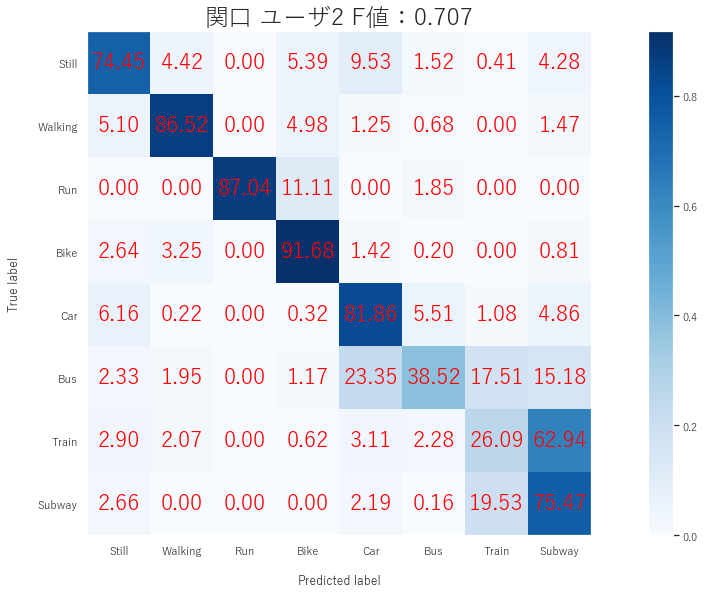

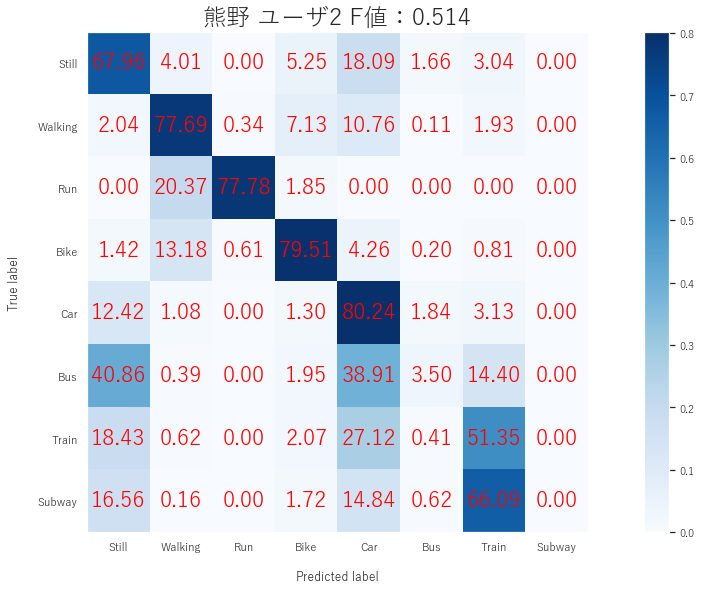

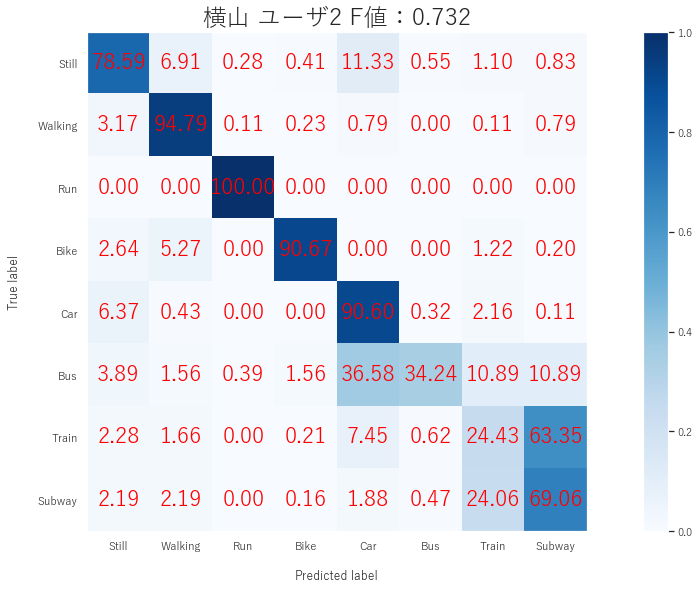

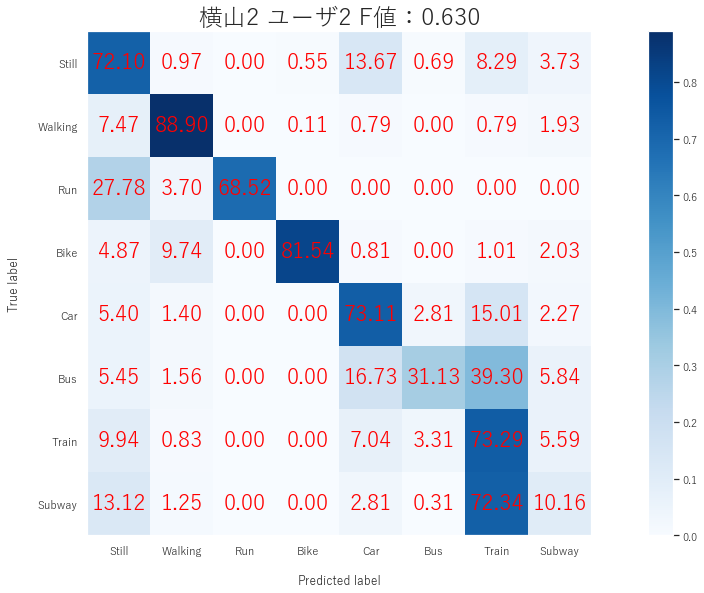

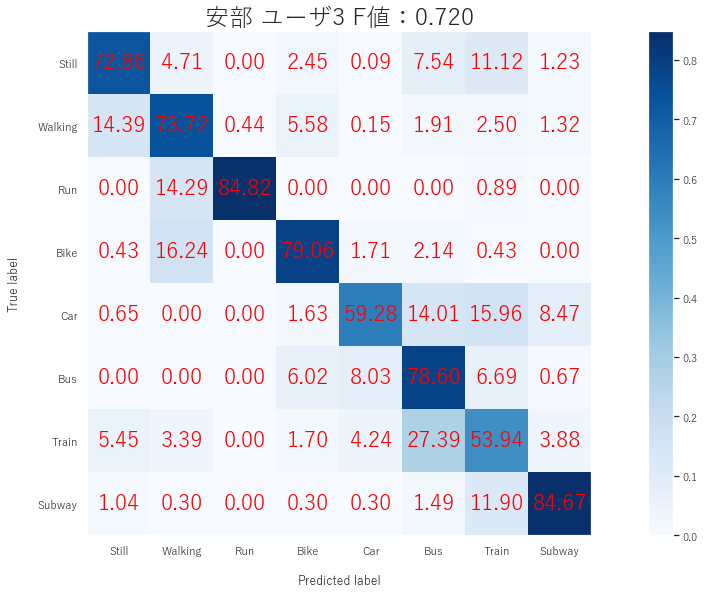

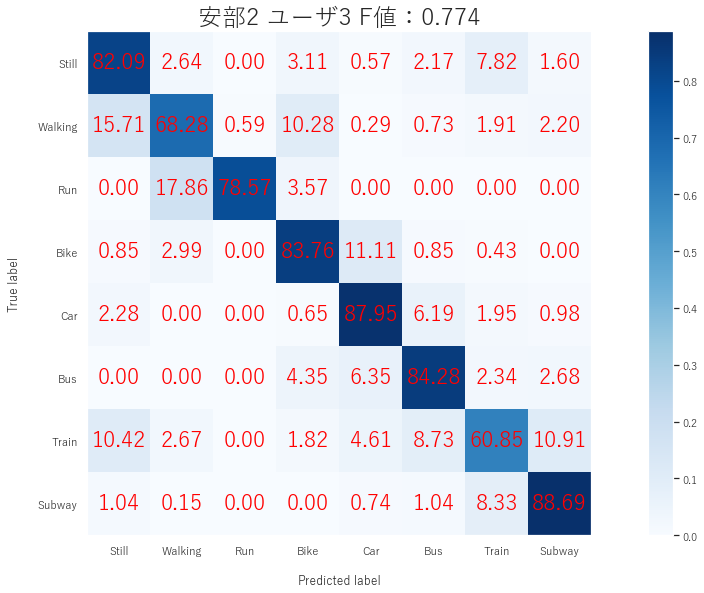

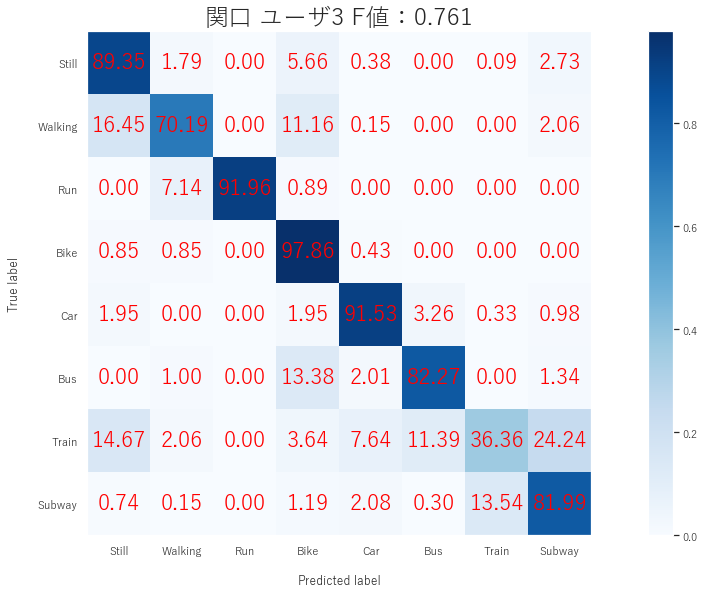

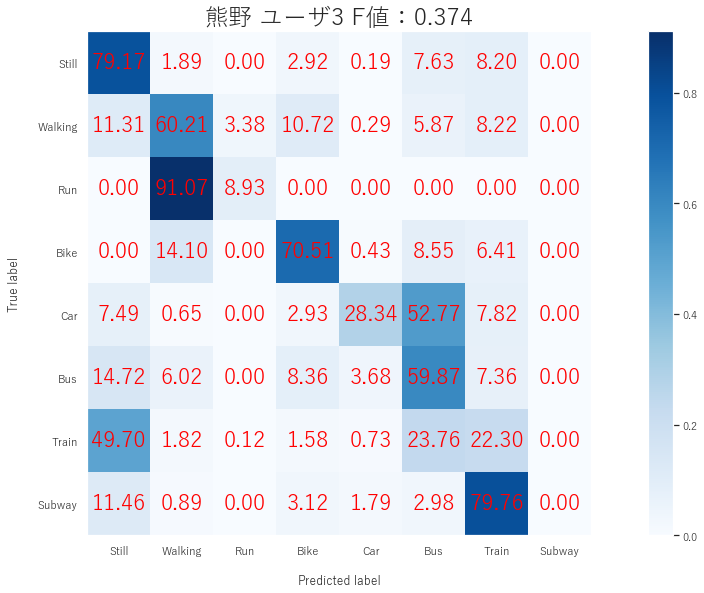

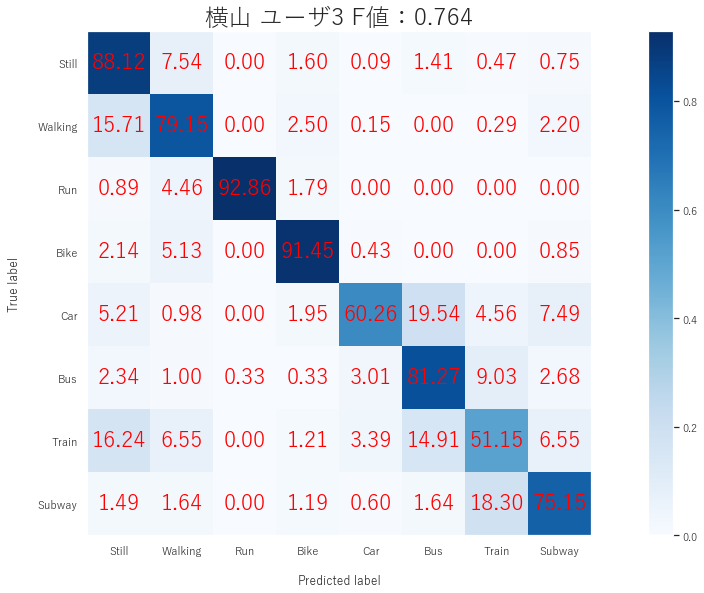

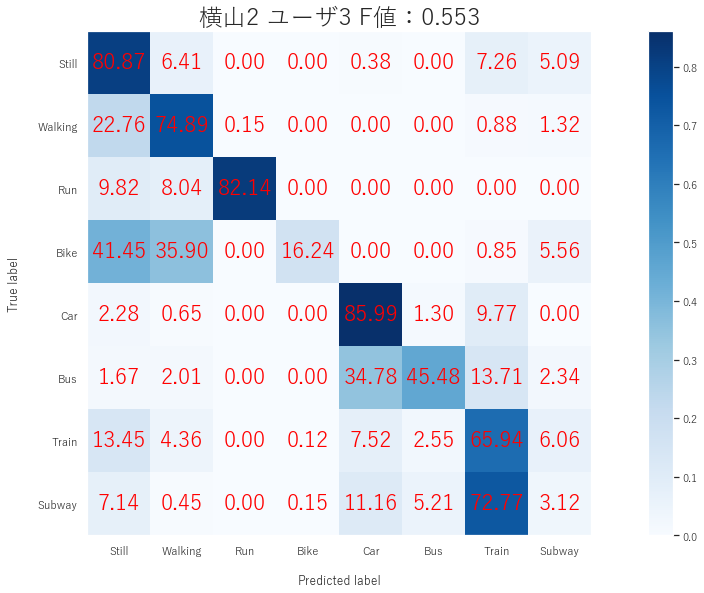

In [8]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]

for i in range(2, 4):
    for pattern, name in zip(patterns, names):
        plot_confusion_matrix(pattern[(pattern['pattern'] == 2) & (pattern['user'] == i)]['label'], pattern[(pattern['pattern'] == 2) & (pattern['user'] == i)][name + "predict"], class_names, normalize=True, fontsize=22)
        plt.grid(False)
        f1 = f1_score(pattern[(pattern['pattern'] == 2) & (pattern['user'] == i)]['label'], pattern[(pattern['pattern'] == 2) & (pattern['user'] == i)][name + "predict"], average="macro")
        plt.title(name + " ユーザ" + str(i) + " F値：" + "{0:.3f}".format(f1), fontsize=24)
        print(name, f1)

# かんたんにロジスティック回帰で分類

In [9]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# パターン2の学習して良いデータの読み込み
## pattern == 1のやつってこと

In [10]:
def logisticX_pattern2(kind, names):
    x = []
#     hold_positions = ["Bag", "Hips", "Torso", "Hand"]
    hold_positions = ["Hips"]
    pattern_file = np.load("validation_pattern2.npy").reshape([-1])
        
    for hold_position in hold_positions:
        file_path = rename(kind, hold_position, names[0])
        xx = np.load(file_path).reshape([-1, 8])
        if (names[0] == "安部" or names[0] == "横山" or names[0] == "安部1") and kind == "train":
            xx = np.delete(xx, 120845, 0)
        if kind == "validation":
#             xx = xx[(pattern_file == 0) | (pattern_file == 2)]
            xx = xx[(pattern_file == 0)]
        for name in names[1:]:
            file_path = rename(kind, hold_position, name)
            tmp = np.load(file_path).reshape([-1, 8])
            if (name == "安部" or name == "横山" or name == "安部1") and kind == "train":
                tmp = np.delete(tmp, 120845, 0)
            if kind == "validation":
#                 tmp = tmp[(pattern_file == 0) | (pattern_file == 2)]
                tmp = tmp[(pattern_file == 0)]
            xx = np.concatenate([xx, tmp], axis=1)
            print(xx.shape)
        x.append(xx)
            
    x = np.array(x)
    x = x.reshape([-1, 8])
    return x

In [11]:
pattern_file = np.load("validation_pattern2.npy").reshape([-1])

x_train = logisticX_pattern2("validation", names)
# x_train = np.concatenate([x_train, logisticX_pattern2("validation", names)], axis=0)

# y_train_tmp = np.delete(np.load("../../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1, 1]), 120845, 0)
# y_train = np.concatenate([y_train_tmp], axis=0)
# y_train_tmp = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
# y_train_tmp = y_train_tmp[pattern_file == 1]
# y_train = np.concatenate([y_train, y_train_tmp], axis=0)

y_train = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
# y_train = y_train[(pattern_file == 0) | (pattern_file == 2)].reshape([-1, 1])
y_train = y_train[(pattern_file == 0)].reshape([-1, 1])

x_train = x_train.reshape([-1, 8 * len(names)])
x_train.shape, y_train.shape

(5696, 16)
(5696, 24)
(5696, 32)
(5696, 40)
(5696, 48)


((5696, 48), (5696, 1))

## 標準化

In [12]:
x_train = (x_train - np.mean(x_train, axis=0, keepdims=True)) / np.std(x_train, axis=0, keepdims=True)

x_train[:, 0].mean(), x_train[:, 0].std()

(2.2984623e-06, 1.0000001)

## ロジスティック回帰で学習

In [13]:
# xx_train = np.concatenate([x_train[:, 16:24], x_train[:, 16:]], axis=1)

lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(x_train[:, 8:], y_train) # ロジスティック回帰モデルの重みを学習


C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
def logisticTest_pattern2(kind, names):
    x = []
#     hold_positions = ["Bag", "Hips", "Torso", "Hand"]
    hold_positions = ["Hips"]
    pattern_file = np.load("validation_pattern2.npy").reshape([-1])
        
    for hold_position in hold_positions:
        file_path = rename(kind, hold_position, names[0])
        xx = np.load(file_path).reshape([-1, 8])
        if (names[0] == "安部" or names[0] == "横山" or names[0] == "安部1" or name == "横山2") and kind == "train":
            xx = np.delete(xx, 120845, 0)
        if kind == "validation":
            xx = xx[pattern_file == 2]
        for name in names[1:]:
            file_path = rename(kind, hold_position, name)
            tmp = np.load(file_path).reshape([-1, 8])
            if (name == "安部" or name == "横山" or name == "安部1" or name == "横山2") and kind == "train":
                tmp = np.delete(tmp, 120845, 0)
            if kind == "validation":
                tmp = tmp[pattern_file == 2]
            xx = np.concatenate([xx, tmp], axis=1)
            print(xx.shape)
        x.append(xx)
            
    x = np.array(x)
    x = x.reshape([-1, 8])
    
#     # ユーザ番号も入れとく
#     user_label = [2] * 14813 + [3] * 13872
#     user_label = np.array(user_label).reshape([-1, 1])
#     user_label = user_label[pattern_file == 2]
    return x, user_label

In [15]:
def logisticTest_pattern2(kind, names):
    x = []
#     hold_positions = ["Bag", "Hips", "Torso", "Hand"]
    hold_positions = ["Hips"]
    pattern_file = np.load("validation_pattern2.npy").reshape([-1])
        
    for hold_position in hold_positions:
        file_path = rename(kind, hold_position, names[0])
        xx = np.load(file_path).reshape([-1, 8])
        if names[0] == "安部3":
            xx = xx
        else:
            if (names[0] == "安部" or names[0] == "横山" or names[0] == "安部1") and kind == "train":
                xx = np.delete(xx, 120845, 0)
            if kind == "validation":
                xx = xx[pattern_file == 2]
        for name in names[1:]:
            file_path = rename(kind, hold_position, name)
            tmp = np.load(file_path).reshape([-1, 8])
            if name == "安部3":
                xx = np.concatenate([xx, tmp], axis=1)
                continue
            if (name == "安部" or name == "横山" or name == "安部1") and kind == "train":
                tmp = np.delete(tmp, 120845, 0)
            if kind == "validation":
                tmp = tmp[pattern_file == 2]
            xx = np.concatenate([xx, tmp], axis=1)
            print(xx.shape)
        x.append(xx)
            
    x = np.array(x)
    x = x.reshape([-1, 8])
    
    # ユーザ番号も入れとく
    user_label = [2] * 14813 + [3] * 13872
    user_label = np.array(user_label).reshape([-1, 1])
    user_label = user_label[pattern_file == 2]
    return x, user_label

In [146]:
x_test, user_label = logisticTest_pattern2("train", names)
y_test_tmp = np.load("../../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1, 1])
# y_test_tmp = y_test_tmp[pattern_file == 2]
y_test = np.concatenate([y_test_tmp], axis=0)
y_test = y_test.reshape([-1, 1])
# y_test = np.concatenate([y_test, user_label], axis=1)
x_test = x_test.reshape([-1, 8 * len(names)])

x_test.shape, y_test.shape

FileNotFoundError: [Errno 2] No such file or directory: 'pattern2NewTest/train_Hips_安部2分類_pattern2.npy'

In [16]:
# names = ["安部3", "関口", "熊野", "横山", "横山2"]
x_test, user_label = logisticTest_pattern2("validation", names)
y_test_tmp = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
y_test_tmp = y_test_tmp[pattern_file == 2]
y_test = np.concatenate([y_test_tmp], axis=0)
y_test = y_test.reshape([-1, 1])
y_test = np.concatenate([y_test, user_label], axis=1)
x_test = x_test.reshape([-1, 8 * len(names)])

x_test.shape, y_test.shape

(8651, 16)
(8651, 24)
(8651, 32)
(8651, 40)
(8651, 48)


((8651, 48), (8651, 2))

In [ ]:
y_test = np.delete(y_test, 120845, 0)
y_test.shape

### 標準化

In [17]:
x_test = (x_test - np.mean(x_test, axis=0, keepdims=True)) / np.std(x_test, axis=0, keepdims=True)

x_test[:, 0].mean(), x_test[:, 0].std()

(1.8449535e-06, 1.0000035)

In [18]:
# x_test = np.concatenate([x_test[:, :8], x_test[:, 16:]], axis=1)
predict = lr.predict(x_test[:, 8:])
print(predict)

[3. 3. 3. ... 2. 2. 1.]


## 電車と地下鉄の列を安部くんのモデルで上書き

In [19]:
tmp = np.argmax(x_test[:, :8], axis=1) + 1
predict[(y_test[:, 1] == 2) & ((tmp == 7) | (tmp == 8))] = tmp[(y_test[:, 1] == 2) & ((tmp == 7) | (tmp == 8))]

np.unique(predict)

array([1., 2., 3., 4., 5., 6., 7., 8.])

In [20]:
labels = []
for i in range(8):
    labels.append(np.sum(predict == (i+1)))

In [21]:
true_labels = []
for i in range(8):
    true_labels.append(np.sum(y_test[:, 0] == (i+1)))

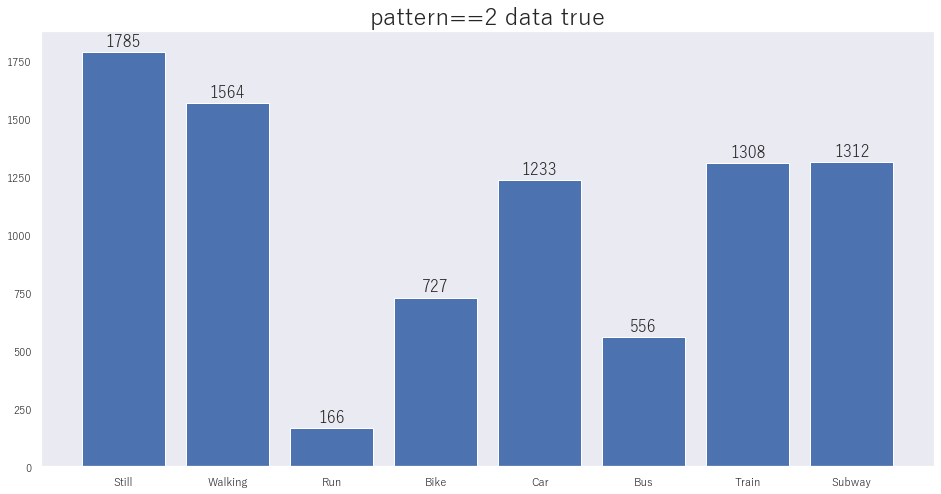

In [22]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]

fig, ax = plt.subplots(figsize=(16, 8))
rect = plt.bar(class_names, np.array(true_labels))
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom', fontsize=16)
autolabel(rect)
plt.grid(False)
plt.title("pattern==2 data true", fontsize=24)
plt.show()

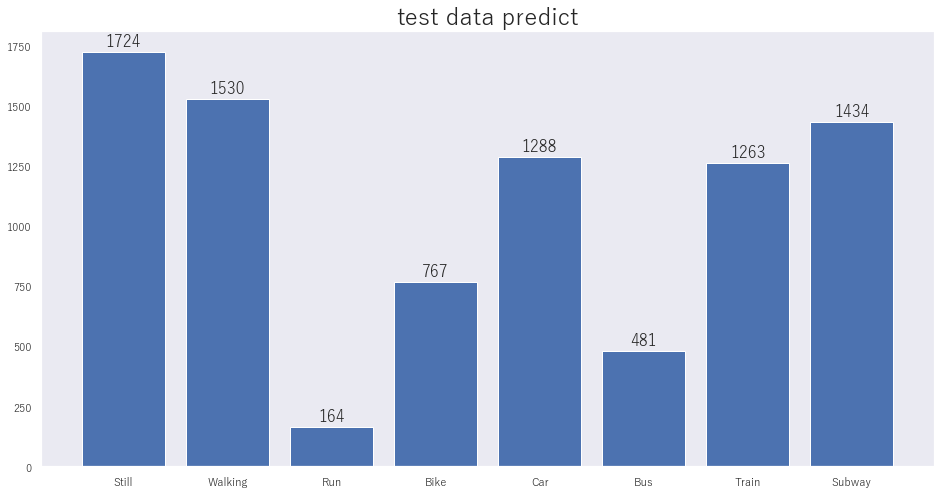

In [23]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]

fig, ax = plt.subplots(figsize=(16, 8))
rect = plt.bar(class_names, np.array(labels))
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom', fontsize=16)
autolabel(rect)
plt.grid(False)
plt.title("test data predict", fontsize=24)
plt.show()

## ユーザごとにアンサンブル結果出す

Hips_アンサンブル結果 0.8155546449282884
Hips_アンサンブル結果 0.8629676479521935


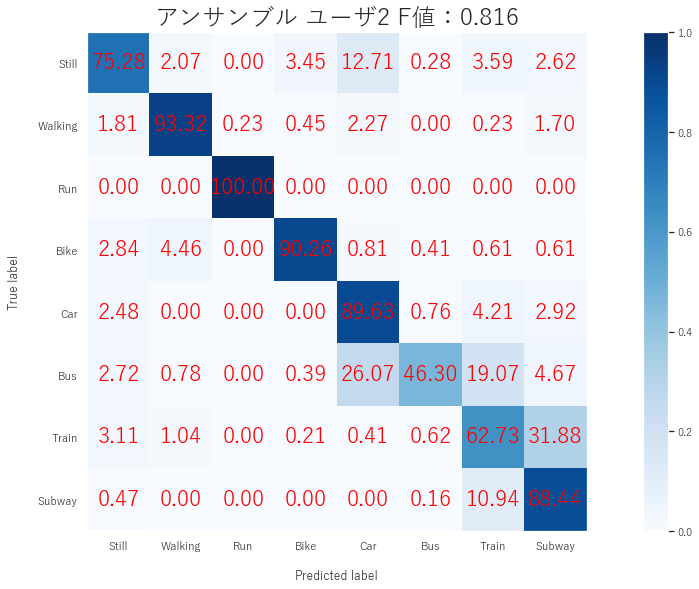

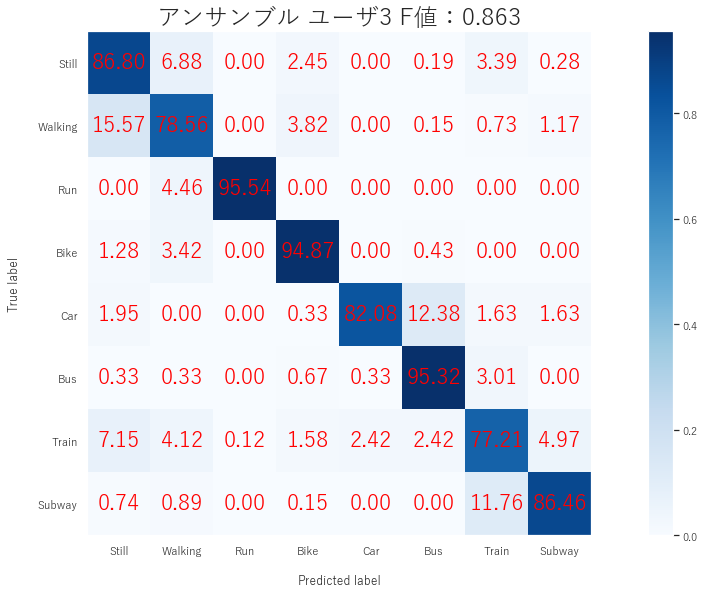

In [24]:
#### hold_positions = ["Bag", "Hips", "Torso", "Hand"]
hold_positions = ["Hips"]
for j in range(2, 4):
    for i in range(len(hold_positions)):
        plot_confusion_matrix(y_test[y_test[:, 1] == j][y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1), 0], predict[y_test[:, 1] == j][y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1)], \
                              class_names, normalize=True, fontsize=22)
        plt.grid(False)

        f1 = f1_score(y_test[y_test[:, 1] == j][y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1), 0], predict[y_test[:, 1] == j][y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1)], average="macro")
        print(hold_positions[i] + "_アンサンブル結果", f1)
        plt.title("アンサンブル ユーザ" + str(j) + " F値：" + "{0:.3f}".format(f1), fontsize=24)

Hips_アンサンブル結果 0.8483616025945013


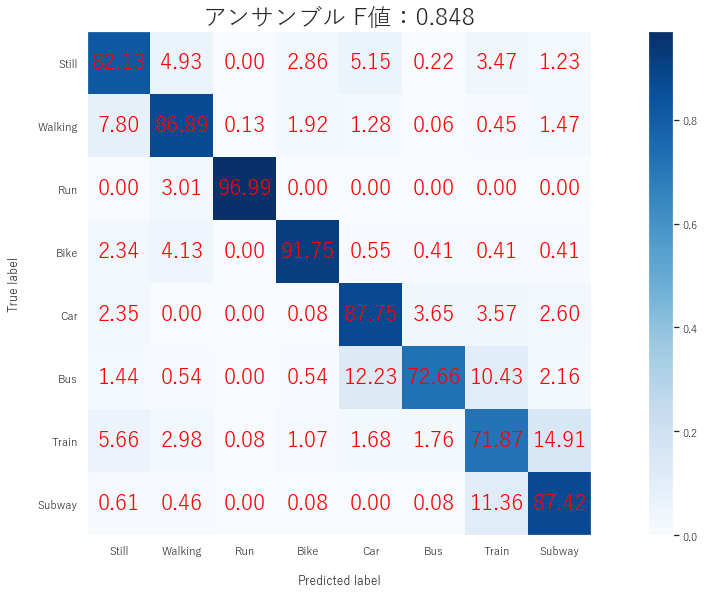

In [25]:
# hold_positions = ["Bag", "Hips", "Torso", "Hand"]
hold_positions = ["Hips"]
for i in range(len(hold_positions)):
    plot_confusion_matrix(y_test[y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1), 0], predict[y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1)], class_names, normalize=True, fontsize=22)
    plt.grid(False)

    f1 = f1_score(y_test[y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1), 0], predict[y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1)], average="macro")
    print(hold_positions[i] + "_アンサンブル結果", f1)
    plt.title("アンサンブル F値：" + "{0:.3f}".format(f1), fontsize=24)

In [117]:
y_test.shape, predict.shape

((8651, 2), (8651,))

In [132]:
def logisticTest_pattern2(kind, names):
    file_path = rename(kind, "", names[0])
    x = np.load(file_path)
    print(x.shape)
    for name in names[1:]:
        file_path = rename(kind, "", name)
        x = np.concatenate([x, np.load(file_path)], axis=1)
        print(x.shape)
    return x

In [133]:
x_test = logisticTest_pattern2("test", names)
x_test = x_test.reshape([-1, 8 * len(names)])

# test_user.npyを読み込む
test_user = np.load("test_user.npy").reshape([-1])

x_test.shape, test_user.shape

(57573, 8)
(57573, 16)
(57573, 24)
(57573, 32)
(57573, 40)
(57573, 48)


((57573, 48), (57573,))

### 標準化

In [134]:
x_test = (x_test - np.mean(x_test, axis=0, keepdims=True)) / np.std(x_test, axis=0, keepdims=True)

x_test[:, 0].mean(), x_test[:, 0].std()

(1.7342411413164031e-15, 0.9999999999999959)

In [121]:
np.unique(np.where(x_test[:, 40:] >= 0.75)[0]).shape

(56240,)

In [135]:
predict = lr.predict(x_test[:, 8:])
print(predict, np.unique(predict), predict.shape)

moving_states = ['Still', 'Walking', 'Run', 'Bike', 'Car', 'Bus', 'Train', 'Subway']
for i in range(8):
    print(moving_states[i], np.sum(predict == (i+1)))

[4. 2. 5. ... 2. 2. 2.] [1. 2. 3. 4. 5. 6. 7. 8.] (57573,)
Still 11794
Walking 10879
Run 710
Bike 4811
Car 6533
Bus 4986
Train 9563
Subway 8297


## 電車と地下鉄の列を安部くんのモデルで上書き

In [136]:
predict[test_user == 2].shape, np.unique(predict[(test_user == 2) & ((tmp == 7) | (tmp == 8))])

((39626,), array([1., 2., 3., 4., 5., 6., 7., 8.]))

In [137]:
tmp = np.argmax(x_test[:, :8], axis=1) + 1
predict[(test_user == 2) & ((tmp == 7) | (tmp == 8))] = tmp[(test_user == 2) & ((tmp == 7) | (tmp == 8))]

moving_states = ['Still', 'Walking', 'Run', 'Bike', 'Car', 'Bus', 'Train', 'Subway']
for i in range(8):
    print(moving_states[i], np.sum(predict == (i+1)))

Still 10599
Walking 10710
Run 706
Bike 4288
Car 4828
Bus 3985
Train 12116
Subway 10341


## 提出ファイル作成

In [124]:
from tqdm import tqdm
result = []
for i in tqdm(range(len(predict))):
    result.append([predict[i]] * 500)
result = np.array(result).reshape([-1, 500]).astype(np.int32)
result.shape

100%|████████████████████████████████████████████████████████████████████████| 57573/57573 [00:00<00:00, 143655.30it/s]


(57573, 500)

In [125]:
np.savetxt("TDU_BSA_predictions0625_2.txt", result, fmt='%i')

(8.5, 0.5)

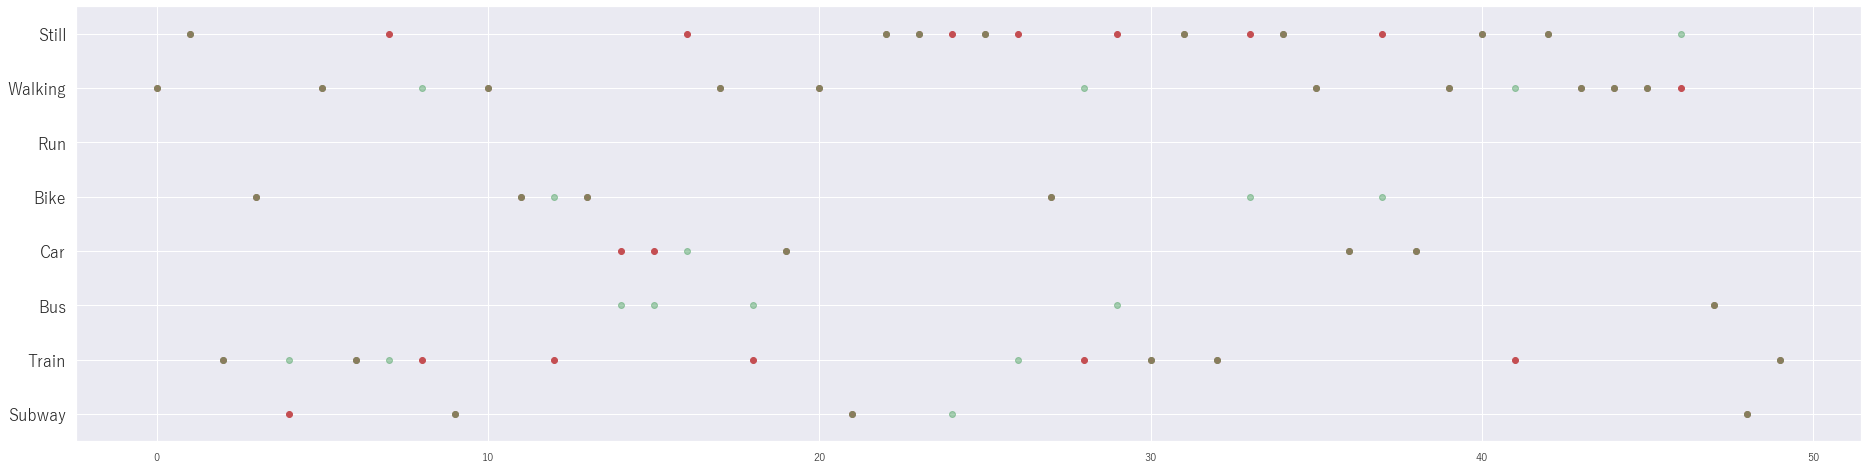

In [138]:
plt.figure(figsize=(32, 8))
plt.plot(predict[50:100], 'r', marker='o', linestyle='None')
plt.plot(np.argmax(x_test[50:100, :8], axis=1) + 1, 'g', marker='o', linestyle='None', alpha=0.5)
plt.yticks(np.arange(1, 9), ['Still', "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"], fontsize=16)
plt.ylim(8.5, 0.5)

In [83]:
labels = []
for i in range(8):
    labels.append(np.sum(predict == (i+1)))

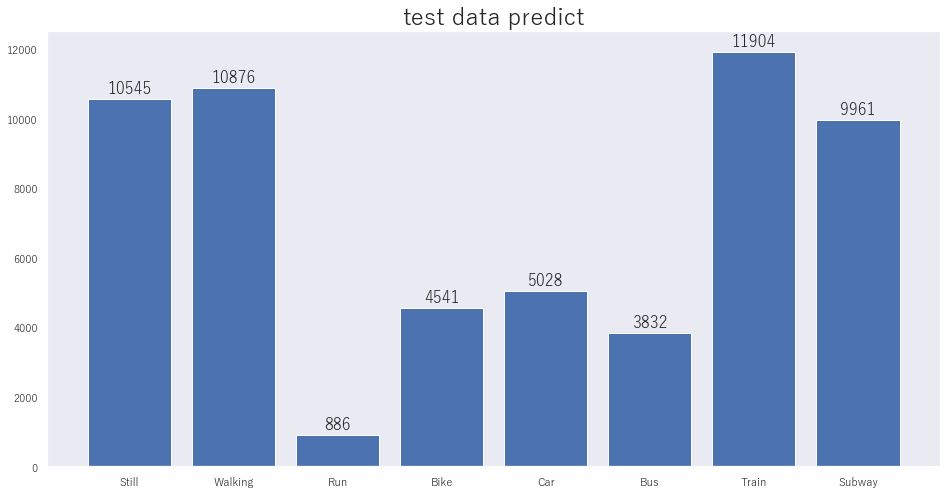

In [84]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]

fig, ax = plt.subplots(figsize=(16, 8))
rect = plt.bar(class_names, np.array(labels))
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom', fontsize=16)
autolabel(rect)
plt.grid(False)
plt.title("test data predict", fontsize=24)
plt.show()

In [86]:
predict = lr.predict_proba(x_test[:, 8:])
predict.shape

(57573, 8)

In [87]:
np.mean(np.max(predict, axis=1))

0.7304461228889059

In [88]:
labels = []
for i in range(8):
    labels.append(len(np.where(predict[:, i] >= 0.75)[0]))
    print(len(np.where(predict[:, i] >= 0.75)[0]))

6115
7090
653
3703
3625
2125
3182
3461


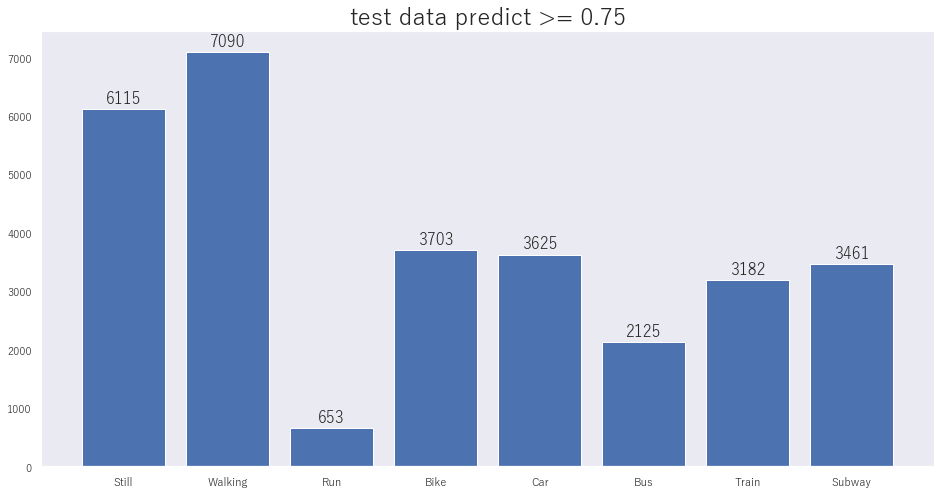

In [89]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]

fig, ax = plt.subplots(figsize=(16, 8))
rect = plt.bar(class_names, np.array(labels))
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom', fontsize=16)
autolabel(rect)
plt.grid(False)
plt.title("test data predict >= 0.75", fontsize=24)
plt.show()

## まずは、3人の出力確率をDeep Learningで学習

In [ ]:
import numpy as np
import os
import random
import scipy
from scipy import signal
from numpy.fft import fft
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.initializers import he_normal
from tensorflow.python.keras.utils.vis_utils import plot_model

from sklearn.model_selection import train_test_split

import pandas as pd
import pickle

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
pattern_file = np.load("validation_pattern2.npy").reshape([-1])
names = ["安部", "熊野", "横山"]

x_train = logisticX_pattern2("train", names)
x_train = np.concatenate([x_train, logisticX_pattern2("validation", names)], axis=0)

y_train_tmp = np.delete(np.load("../../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1, 1]), 120845, 0)
y_train = np.concatenate([y_train_tmp], axis=0)
y_train_tmp = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
y_train_tmp = y_train_tmp[pattern_file == 1]
y_train = np.concatenate([y_train, y_train_tmp], axis=0)
y_train = y_train.reshape([-1, 1])

x_train = x_train.reshape([-1, 8 * len(names)])
x_train.shape, y_train.shape

In [ ]:
x_train = (x_train - x_train.mean(axis=0, keepdims=True)) / x_train.std(axis=0, keepdims=True)
x_train.mean(), x_train.std()

In [ ]:
x_train = np.round(x_train, 5)
x_train.shape

In [ ]:
y_train -= 1
np.unique(y_train)

In [ ]:
lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(x_train, y_train) # ロジスティック回帰モデルの重みを学習


In [ ]:
names = ["安部", "熊野", "横山"]
x_test = logisticTest_pattern2("validation", names)
y_test_tmp = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
y_test_tmp = y_test_tmp[pattern_file == 2]
y_test = np.concatenate([y_test_tmp], axis=0)
y_test = y_test.reshape([-1, 1])
x_test = x_test.reshape([-1, 8 * len(names)])

x_test.shape, y_test.shape

In [ ]:
train_predict = model.predict_proba(x_train)
predict = model.predict_proba(x_test)

train_predict.shape, predict.shape

In [ ]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]
plot_confusion_matrix(y_test-1, np.argmax(predict, axis=1), class_names, normalize=False, fontsize=24)
plt.grid(False)

f1 = f1_score(y_test-1, np.argmax(predict, axis=1), average="macro")
print(predict.shape)
print("アンサンブル結果", f1)

In [ ]:
pattern_file = np.load("validation_pattern2.npy").reshape([-1])
names = ["関口"]

x_train = logisticX_pattern2("train", names)
x_train = np.concatenate([x_train, logisticX_pattern2("validation", names)], axis=0)

y_train_tmp = np.delete(np.load("../../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1, 1]), 120845, 0)
y_train = np.concatenate([y_train_tmp], axis=0)
y_train_tmp = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
y_train_tmp = y_train_tmp[pattern_file == 1]
y_train = np.concatenate([y_train, y_train_tmp], axis=0)
y_train = y_train.reshape([-1, 1])

x_train = x_train.reshape([-1, 8 * len(names)])
x_train.shape, y_train.shape

In [ ]:
x_train = np.concatenate([x_train, train_predict], axis=1)
x_train.shape

In [ ]:
lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(x_train, y_train) # ロジスティック回帰モデルの重みを学習


In [ ]:
names = ["関口"]
x_test = logisticTest_pattern2("validation", names)
y_test_tmp = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
y_test_tmp = y_test_tmp[pattern_file == 2]
y_test = np.concatenate([y_test_tmp], axis=0)
y_test = y_test.reshape([-1, 1])
x_test = x_test.reshape([-1, 8 * len(names)])

x_test.shape, y_test.shape

In [ ]:
x_test = np.concatenate([x_test, predict], axis=1)
x_test.shape

In [ ]:
predict = lr.predict(x_test)
print(predict)

In [ ]:
plot_confusion_matrix(y_test, predict, class_names, normalize=False, fontsize=24)
plt.grid(False)

f1 = f1_score(y_test, predict, average="macro")
print(predict.shape)
print("アンサンブル結果", f1)

In [ ]:
# hold_positions = ["Bag", "Hips", "Torso", "Hand"]
hold_positions = ["Hips"]
for i in range(len(hold_positions)):
    plot_confusion_matrix(y_test[y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1)], predict[y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1)], class_names, normalize=False, fontsize=24)
    plt.title(hold_positions[i])
    plt.grid(False)

    f1 = f1_score(y_test[y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1)], predict[y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1)], average="macro")
    print(hold_positions[i] + "_アンサンブル結果", f1)